##### Import Libraries

In [5]:
import os
import pickle
import re
import zipfile
from collections import Counter
import dill
import matplotlib.pyplot as plt
import nltk
import numpy as np
import pandas as pd
import seaborn as sns
from nltk.corpus import stopwords
from sklearn.feature_extraction.text import TfidfVectorizer

##### Load Data and Data Description

In [7]:
train_df = pd.read_csv("D:\\MS sem 2\\NLP\\train.csv")
test_labels_df = pd.read_csv("D:\\MS sem 2\\NLP\\test_labels.csv")
test_df = pd.read_csv("D:\\MS sem 2\\NLP\\test.csv")

In [8]:
train_df.head()

,id,comment_text,toxic,severe_toxic,obscene,threat,insult,identity_hate
0,0000997932d777bf,Explanation\nWhy the edits made under my usern...,0,0,0,0,0,0
1,000103f0d9cfb60f,D'aww! He matches this background colour I'm s...,0,0,0,0,0,0
2,000113f07ec002fd,"Hey man, I'm really not trying to edit war. It...",0,0,0,0,0,0
3,0001b41b1c6bb37e,"""\nMore\nI can't make any real suggestions on ...",0,0,0,0,0,0
4,0001d958c54c6e35,"You, sir, are my hero. Any chance you remember...",0,0,0,0,0,0


In [9]:
train_df.describe()

,toxic,severe_toxic,obscene,threat,insult,identity_hate
count,159571.000000,159571.000000,159571.000000,159571.000000,159571.000000,159571.000000
mean,0.095844,0.009996,0.052948,0.002996,0.049364,0.008805
std,0.294379,0.099477,0.223931,0.054650,0.216627,0.093420
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [10]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 159571 entries, 0 to 159570
Data columns (total 8 columns):
 #   Column         Non-Null Count   Dtype 
---  ------         --------------   ----- 
 0   id             159571 non-null  object
 1   comment_text   159571 non-null  object
 2   toxic          159571 non-null  int64 
 3   severe_toxic   159571 non-null  int64 
 4   obscene        159571 non-null  int64 
 5   threat         159571 non-null  int64 
 6   insult         159571 non-null  int64 
 7   identity_hate  159571 non-null  int64 
dtypes: int64(6), object(2)
memory usage: 9.7+ MB


In [11]:
train_df.isnull().sum()

id               0
comment_text     0
toxic            0
severe_toxic     0
obscene          0
threat           0
insult           0
identity_hate    0
dtype: int64

In [12]:
test_df.head()

,id,comment_text
0,00001cee341fdb12,Yo bitch Ja Rule is more succesful then you'll...
1,0000247867823ef7,== From RfC == \n\n The title is fine as it is...
2,00013b17ad220c46,""" \n\n == Sources == \n\n * Zawe Ashton on Lap..."
3,00017563c3f7919a,":If you have a look back at the source, the in..."
4,00017695ad8997eb,I don't anonymously edit articles at all.


In [13]:
test_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 153164 entries, 0 to 153163
Data columns (total 2 columns):
 #   Column        Non-Null Count   Dtype 
---  ------        --------------   ----- 
 0   id            153164 non-null  object
 1   comment_text  153164 non-null  object
dtypes: object(2)
memory usage: 2.3+ MB


In [14]:
test_df.isnull().sum()

id              0
comment_text    0
dtype: int64

In [15]:
test_labels_df.head()

,id,toxic,severe_toxic,obscene,threat,insult,identity_hate
0,00001cee341fdb12,-1,-1,-1,-1,-1,-1
1,0000247867823ef7,-1,-1,-1,-1,-1,-1
2,00013b17ad220c46,-1,-1,-1,-1,-1,-1
3,00017563c3f7919a,-1,-1,-1,-1,-1,-1
4,00017695ad8997eb,-1,-1,-1,-1,-1,-1


In [16]:
test_labels_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 153164 entries, 0 to 153163
Data columns (total 7 columns):
 #   Column         Non-Null Count   Dtype 
---  ------         --------------   ----- 
 0   id             153164 non-null  object
 1   toxic          153164 non-null  int64 
 2   severe_toxic   153164 non-null  int64 
 3   obscene        153164 non-null  int64 
 4   threat         153164 non-null  int64 
 5   insult         153164 non-null  int64 
 6   identity_hate  153164 non-null  int64 
dtypes: int64(6), object(1)
memory usage: 8.2+ MB


In [17]:
test_labels_df.isnull().sum()

id               0
toxic            0
severe_toxic     0
obscene          0
threat           0
insult           0
identity_hate    0
dtype: int64

In [18]:
train_df.shape

(159571, 8)

In [19]:
test_df.shape

(153164, 2)

In [20]:
test_labels_df.shape

(153164, 7)

##### Elaboratory Data Analysis 

##### Distribution of Classes in Training Data

C:\Users\pc\AppData\Local\Temp\ipykernel_30660\1464560583.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=class_counts.index, y=class_counts.values, palette='viridis')


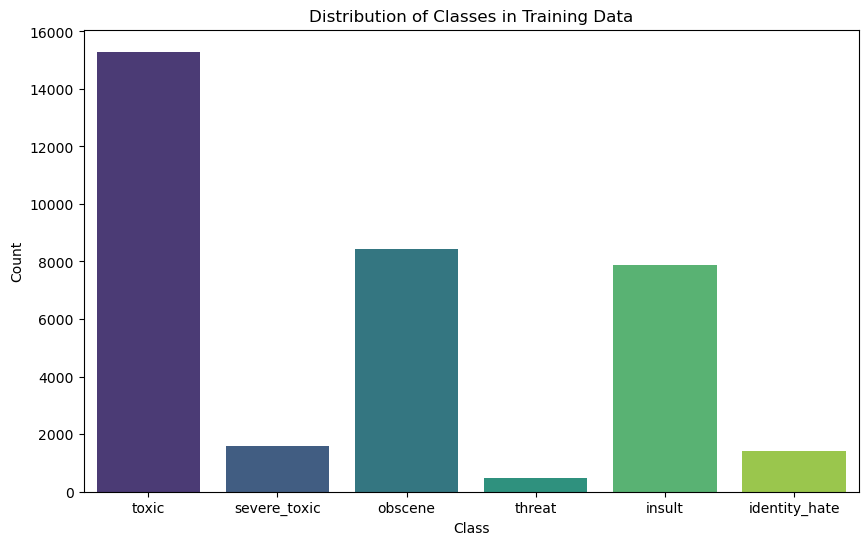

In [23]:
class_counts = train_df[['toxic', 'severe_toxic', 'obscene', 'threat', 'insult', 'identity_hate']].sum()

plt.figure(figsize=(10, 6))
sns.barplot(x=class_counts.index, y=class_counts.values, palette='viridis')
plt.title('Distribution of Classes in Training Data')
plt.xlabel('Class')
plt.ylabel('Count')
plt.show()

##### Text Analysis

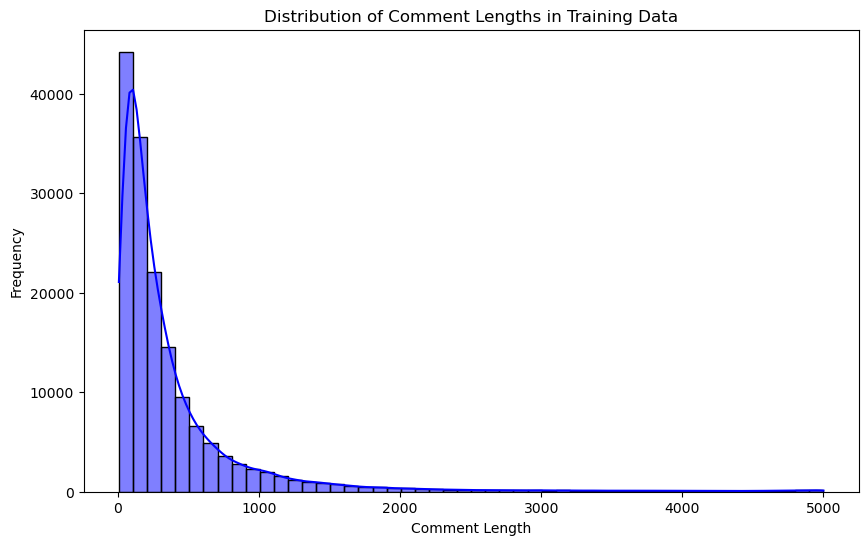

In [25]:
train_df['comment_length'] = train_df['comment_text'].apply(len)
test_df['comment_length'] = test_df['comment_text'].apply(len)

plt.figure(figsize=(10, 6))
sns.histplot(train_df['comment_length'], bins=50, kde=True, color='blue')
plt.title('Distribution of Comment Lengths in Training Data')
plt.xlabel('Comment Length')
plt.ylabel('Frequency')
plt.show()

In [26]:
from wordcloud import WordCloud

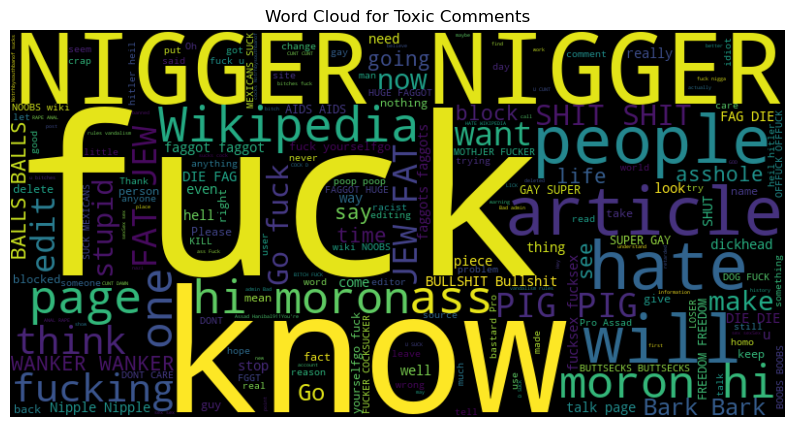

In [27]:
toxic_comments = ' '.join(train_df[train_df['toxic'] == 1]['comment_text'])
wordcloud = WordCloud(width=800, height=400, background_color='black').generate(toxic_comments)

plt.figure(figsize=(10, 6))
plt.imshow(wordcloud, interpolation='bilinear')
plt.title('Word Cloud for Toxic Comments')
plt.axis('off')
plt.show()

##### Correlation Analysis

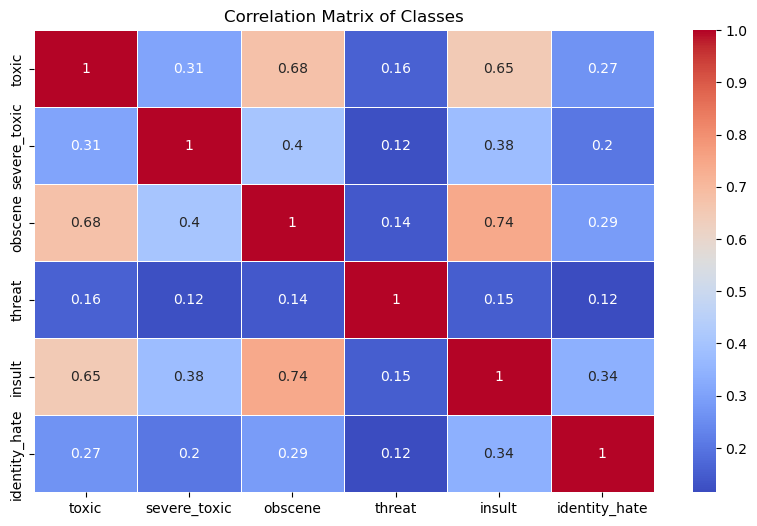

In [29]:
corr_matrix = train_df[['toxic', 'severe_toxic', 'obscene', 'threat', 'insult', 'identity_hate']].corr()

plt.figure(figsize=(10, 6))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Matrix of Classes')
plt.show()

##### Text Preprocesssing

In [31]:
import re
import nltk
from nltk.corpus import stopwords

In [32]:
nltk.download('stopwords')

stop_words = set(stopwords.words('english'))

def preprocess_text(text):
    # Lowercase
    text = text.lower()
    # Remove special characters and numbers
    text = re.sub(r'[^a-z\s]', '', text)
    # Remove stop words
    text = ' '.join([word for word in text.split() if word not in stop_words])
    return text

train_df['cleaned_text'] = train_df['comment_text'].apply(preprocess_text)
test_df['cleaned_text'] = test_df['comment_text'].apply(preprocess_text)

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\pc\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


##### Tokenization

In [34]:
from tensorflow.keras.preprocessing.text import Tokenizer
from keras.preprocessing.sequence import pad_sequences
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
import numpy as np

In [35]:
# Define maximum number of words to consider
MAX_WORDS = 20000

# Initialize the tokenizer
tokenizer = Tokenizer(num_words=MAX_WORDS)
tokenizer.fit_on_texts(train_df['cleaned_text'])

# Tokenize the text
X_train_seq = tokenizer.texts_to_sequences(train_df['cleaned_text'])
X_test_seq = tokenizer.texts_to_sequences(test_df['cleaned_text'])

##### Padding Sequences

In [37]:
# Define maximum sequence length
MAX_SEQ_LEN = 200

# Pad the sequences
X_train_padded = pad_sequences(X_train_seq, maxlen=MAX_SEQ_LEN)
X_test_padded = pad_sequences(X_test_seq, maxlen=MAX_SEQ_LEN)

##### Splitting the Data

In [39]:
# Extract labels
y_train = train_df[['toxic', 'severe_toxic', 'obscene', 'threat', 'insult', 'identity_hate']].values

# Split the training data for validation
X_train, X_val, y_train, y_val = train_test_split(X_train_padded, y_train, test_size=0.2, random_state=42)

X_train.shape, X_val.shape, y_train.shape, y_val.shape

((127656, 200), (31915, 200), (127656, 6), (31915, 6))

##### Adding Text Length Features

In [41]:
train_df['comment_length'] = train_df['comment_text'].apply(len)
test_df['comment_length'] = test_df['comment_text'].apply(len)

##### Generating TF-IDF Features

In [43]:
# Initialize TF-IDF Vectorizer
tfidf_vectorizer = TfidfVectorizer(max_features=MAX_WORDS, stop_words='english')

# Fit and transform the text data
X_train_tfidf = tfidf_vectorizer.fit_transform(train_df['cleaned_text'])
X_test_tfidf = tfidf_vectorizer.transform(test_df['cleaned_text'])

##### Word Embedding

In [82]:
embeddings_index = {}
with open("C:\\Users\\pc\\Downloads\\glove.6B (1)\\glove.6B.100d.txt", encoding='utf8') as f:
    for line in f:
        values = line.split()
        word = values[0]
        coefs = np.asarray(values[1:], dtype='float32')
        embeddings_index[word] = coefs

# Create embedding matrix
embedding_dim = 100
embedding_matrix = np.zeros((MAX_WORDS, embedding_dim))
for word, i in tokenizer.word_index.items():
    if i < MAX_WORDS:
        embedding_vector = embeddings_index.get(word)
        if embedding_vector is not None:
            embedding_matrix[i] = embedding_vector

#### RNN

In [92]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, SimpleRNN, GlobalMaxPooling1D, Dense

# Define the RNN model
rnn_model = Sequential([
    Embedding(input_dim=MAX_WORDS, output_dim=embedding_dim, input_length=MAX_SEQ_LEN, weights=[embedding_matrix], trainable=False),
    SimpleRNN(50, return_sequences=True),
    GlobalMaxPooling1D(),
    Dense(50, activation='relu'),
    Dense(6, activation='sigmoid')
])

# Explicitly build the model to ensure all layers are initialized
rnn_model.build(input_shape=(None, MAX_SEQ_LEN))

# Compile the model
rnn_model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Print model summary
rnn_model.summary()

# Train the model
rnn_history = rnn_model.fit(X_train, y_train, epochs=10, validation_data=(X_val, y_val), batch_size=64)

C:\Users\pc\anaconda3\Lib\site-packages\keras\src\layers\core\embedding.py:90: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


Model: "sequential_5"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ embedding_6 (Embedding)         │ (None, 200, 100)       │     2,000,000 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ simple_rnn_3 (SimpleRNN)        │ (None, 200, 50)        │         7,550 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ global_max_pooling1d_5          │ (None, 50)             │             0 │
│ (GlobalMaxPooling1D)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_10 (Dense)                │ (None, 50)             │         2,550 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_11 (Dense)                │ (None, 6)              │           306 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 2,010,406 (7.67 MB)

 Trainable params: 10,406 (40.65 KB)

 Non-trainable params: 2,000,000 (7.63 MB)

Epoch 1/10
1995/1995 ━━━━━━━━━━━━━━━━━━━━ 46s 22ms/step - accuracy: 0.8737 - loss: 0.1530 - val_accuracy: 0.9940 - val_loss: 0.0781
Epoch 2/10
1995/1995 ━━━━━━━━━━━━━━━━━━━━ 44s 22ms/step - accuracy: 0.9937 - loss: 0.0733 - val_accuracy: 0.9939 - val_loss: 0.0710
Epoch 3/10
1995/1995 ━━━━━━━━━━━━━━━━━━━━ 44s 22ms/step - accuracy: 0.9940 - loss: 0.0668 - val_accuracy: 0.9940 - val_loss: 0.0675
Epoch 4/10
1995/1995 ━━━━━━━━━━━━━━━━━━━━ 46s 23ms/step - accuracy: 0.9940 - loss: 0.0630 - val_accuracy: 0.9905 - val_loss: 0.0712
Epoch 5/10
1995/1995 ━━━━━━━━━━━━━━━━━━━━ 46s 23ms/step - accuracy: 0.9935 - loss: 0.0606 - val_accuracy: 0.9940 - val_loss: 0.0654
Epoch 6/10
1995/1995 ━━━━━━━━━━━━━━━━━━━━ 50s 25ms/step - accuracy: 0.9941 - loss: 0.0587 - val_accuracy: 0.9940 - val_loss: 0.0641
Epoch 7/10
1995/1995 ━━━━━━━━━━━━━━━━━━━━ 47s 23ms/step - accuracy: 0.9943 - loss: 0.0564 - val_accuracy: 0.9938 - val_loss: 0.0639
Epoch 8/10
1995/1995 ━━━━━━━━━━━━━━━━━━━━ 47s 23ms/step - accuracy: 0.9939 -

#### CNN

In [95]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, Conv1D, MaxPooling1D, GlobalMaxPooling1D, Dense

# Define the CNN model
cnn_model = Sequential([
    Embedding(input_dim=MAX_WORDS, output_dim=embedding_dim, input_length=MAX_SEQ_LEN, weights=[embedding_matrix], trainable=False),
    Conv1D(filters=128, kernel_size=5, activation='relu'),
    MaxPooling1D(pool_size=4),
    GlobalMaxPooling1D(),
    Dense(50, activation='relu'),
    Dense(6, activation='sigmoid')
])

# Explicitly build the model to ensure all layers are initialized
cnn_model.build(input_shape=(None, MAX_SEQ_LEN))

# Compile the model
cnn_model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Print model summary
cnn_model.summary()

# Train the model
cnn_history = cnn_model.fit(X_train, y_train, epochs=10, validation_data=(X_val, y_val), batch_size=64)

C:\Users\pc\anaconda3\Lib\site-packages\keras\src\layers\core\embedding.py:90: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


Model: "sequential_6"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ embedding_7 (Embedding)         │ (None, 200, 100)       │     2,000,000 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv1d_4 (Conv1D)               │ (None, 196, 128)       │        64,128 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling1d_2 (MaxPooling1D)  │ (None, 49, 128)        │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ global_max_pooling1d_6          │ (None, 128)            │             0 │
│ (GlobalMaxPooling1D)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_12 (Dense)                │ (None, 50)             │         6,450 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_13 (Dense)                │ (None, 6)              │           306 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 2,070,884 (7.90 MB)

 Trainable params: 70,884 (276.89 KB)

 Non-trainable params: 2,000,000 (7.63 MB)

Epoch 1/10
1995/1995 ━━━━━━━━━━━━━━━━━━━━ 28s 13ms/step - accuracy: 0.9369 - loss: 0.1125 - val_accuracy: 0.9918 - val_loss: 0.0739
Epoch 2/10
1995/1995 ━━━━━━━━━━━━━━━━━━━━ 25s 13ms/step - accuracy: 0.9887 - loss: 0.0632 - val_accuracy: 0.9925 - val_loss: 0.0713
Epoch 3/10
1995/1995 ━━━━━━━━━━━━━━━━━━━━ 26s 13ms/step - accuracy: 0.9887 - loss: 0.0511 - val_accuracy: 0.9864 - val_loss: 0.0718
Epoch 4/10
1995/1995 ━━━━━━━━━━━━━━━━━━━━ 26s 13ms/step - accuracy: 0.9848 - loss: 0.0434 - val_accuracy: 0.9901 - val_loss: 0.0777
Epoch 5/10
1995/1995 ━━━━━━━━━━━━━━━━━━━━ 26s 13ms/step - accuracy: 0.9710 - loss: 0.0382 - val_accuracy: 0.9361 - val_loss: 0.0776
Epoch 6/10
1995/1995 ━━━━━━━━━━━━━━━━━━━━ 26s 13ms/step - accuracy: 0.9507 - loss: 0.0340 - val_accuracy: 0.9635 - val_loss: 0.0858
Epoch 7/10
1995/1995 ━━━━━━━━━━━━━━━━━━━━ 26s 13ms/step - accuracy: 0.9112 - loss: 0.0313 - val_accuracy: 0.9826 - val_loss: 0.0948
Epoch 8/10
1995/1995 ━━━━━━━━━━━━━━━━━━━━ 26s 13ms/step - accuracy: 0.8768 -

#### LSTM

In [99]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, LSTM, GlobalMaxPooling1D, Dense

# Define the LSTM model
lstm_model = Sequential([
    Embedding(input_dim=MAX_WORDS, output_dim=embedding_dim, input_length=MAX_SEQ_LEN, weights=[embedding_matrix], trainable=False),
    LSTM(50, return_sequences=True),
    GlobalMaxPooling1D(),
    Dense(50, activation='relu'),
    Dense(6, activation='sigmoid')
])

# Explicitly build the model to ensure all layers are initialized
lstm_model.build(input_shape=(None, MAX_SEQ_LEN))

# Compile the model
lstm_model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Print model summary
lstm_model.summary()

# Train the model
lstm_history = lstm_model.fit(X_train, y_train, epochs=10, validation_data=(X_val, y_val), batch_size=64)


C:\Users\pc\anaconda3\Lib\site-packages\keras\src\layers\core\embedding.py:90: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


Model: "sequential_7"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ embedding_8 (Embedding)         │ (None, 200, 100)       │     2,000,000 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm (LSTM)                     │ (None, 200, 50)        │        30,200 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ global_max_pooling1d_7          │ (None, 50)             │             0 │
│ (GlobalMaxPooling1D)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_14 (Dense)                │ (None, 50)             │         2,550 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_15 (Dense)                │ (None, 6)              │           306 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 2,033,056 (7.76 MB)

 Trainable params: 33,056 (129.12 KB)

 Non-trainable params: 2,000,000 (7.63 MB)

Epoch 1/10
1995/1995 ━━━━━━━━━━━━━━━━━━━━ 104s 51ms/step - accuracy: 0.9080 - loss: 0.1427 - val_accuracy: 0.9940 - val_loss: 0.0746
Epoch 2/10
1995/1995 ━━━━━━━━━━━━━━━━━━━━ 102s 51ms/step - accuracy: 0.9940 - loss: 0.0682 - val_accuracy: 0.9941 - val_loss: 0.0659
Epoch 3/10
1995/1995 ━━━━━━━━━━━━━━━━━━━━ 105s 53ms/step - accuracy: 0.9941 - loss: 0.0604 - val_accuracy: 0.9941 - val_loss: 0.0629
Epoch 4/10
1995/1995 ━━━━━━━━━━━━━━━━━━━━ 103s 52ms/step - accuracy: 0.9945 - loss: 0.0570 - val_accuracy: 0.9941 - val_loss: 0.0607
Epoch 5/10
1995/1995 ━━━━━━━━━━━━━━━━━━━━ 104s 52ms/step - accuracy: 0.9942 - loss: 0.0531 - val_accuracy: 0.9941 - val_loss: 0.0613
Epoch 6/10
1995/1995 ━━━━━━━━━━━━━━━━━━━━ 109s 55ms/step - accuracy: 0.9939 - loss: 0.0511 - val_accuracy: 0.9941 - val_loss: 0.0599
Epoch 7/10
1995/1995 ━━━━━━━━━━━━━━━━━━━━ 106s 53ms/step - accuracy: 0.9942 - loss: 0.0485 - val_accuracy: 0.9941 - val_loss: 0.0597
Epoch 8/10
1995/1995 ━━━━━━━━━━━━━━━━━━━━ 107s 53ms/step - accuracy: 

##### Evaluate Models

In [102]:
rnn_eval = rnn_model.evaluate(X_val, y_val)
print(f"RNN Model - Loss: {rnn_eval[0]}, Accuracy: {rnn_eval[1]}")


998/998 ━━━━━━━━━━━━━━━━━━━━ 6s 6ms/step - accuracy: 0.9941 - loss: 0.0613
RNN Model - Loss: 0.06350594758987427, Accuracy: 0.9939213395118713


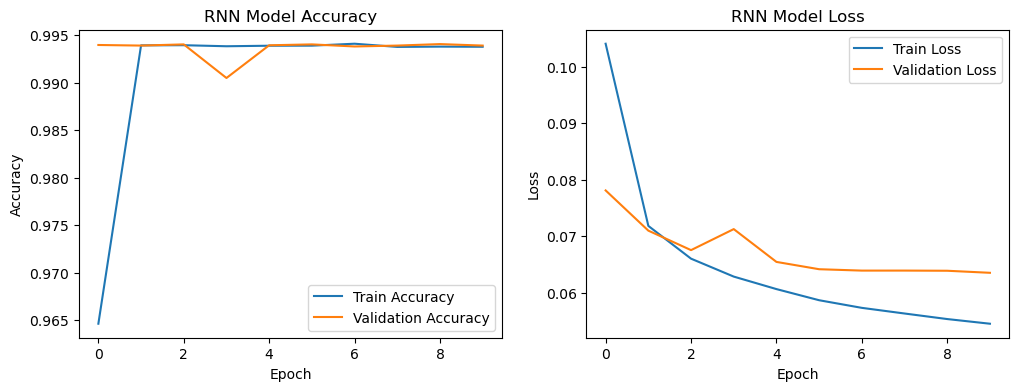

In [122]:
import matplotlib.pyplot as plt

# Plot training & validation accuracy and loss for RNN
plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.plot(rnn_history.history['accuracy'], label='Train Accuracy')
plt.plot(rnn_history.history['val_accuracy'], label='Validation Accuracy')
plt.title('RNN Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(rnn_history.history['loss'], label='Train Loss')
plt.plot(rnn_history.history['val_loss'], label='Validation Loss')
plt.title('RNN Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

plt.show()

In [104]:
cnn_eval = cnn_model.evaluate(X_val, y_val)
print(f"CNN Model - Loss: {cnn_eval[0]}, Accuracy: {cnn_eval[1]}")

998/998 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.6914 - loss: 0.1008
CNN Model - Loss: 0.10295272618532181, Accuracy: 0.6922137141227722


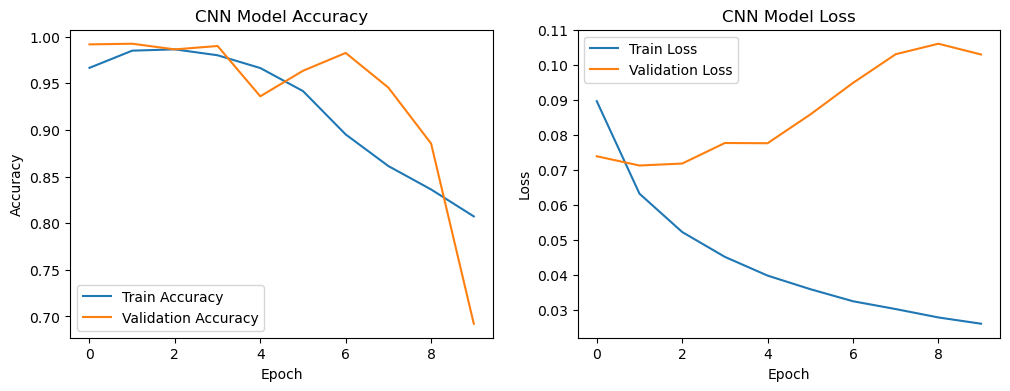

In [124]:
# Plot training & validation accuracy and loss for CNN
plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.plot(cnn_history.history['accuracy'], label='Train Accuracy')
plt.plot(cnn_history.history['val_accuracy'], label='Validation Accuracy')
plt.title('CNN Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(cnn_history.history['loss'], label='Train Loss')
plt.plot(cnn_history.history['val_loss'], label='Validation Loss')
plt.title('CNN Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

plt.show()

In [106]:
lstm_eval = lstm_model.evaluate(X_val, y_val)
print(f"LSTM Model - Loss: {lstm_eval[0]}, Accuracy: {lstm_eval[1]}")

998/998 ━━━━━━━━━━━━━━━━━━━━ 15s 15ms/step - accuracy: 0.9942 - loss: 0.0610
LSTM Model - Loss: 0.061837635934352875, Accuracy: 0.994046688079834


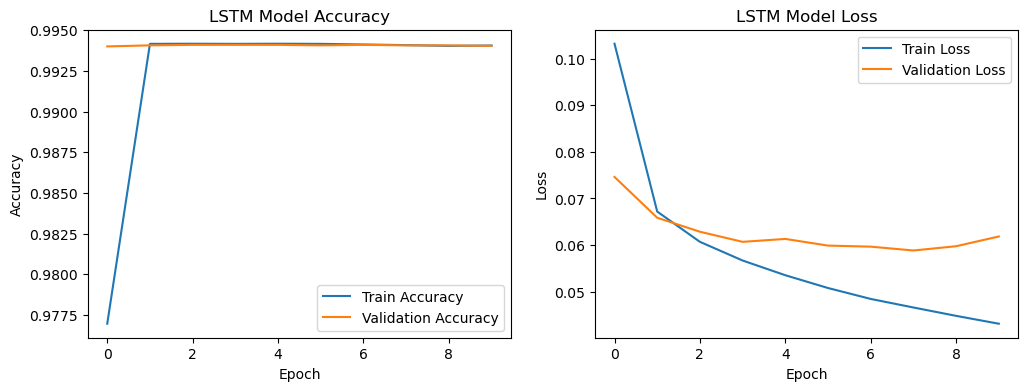

In [126]:
plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.plot(lstm_history.history['accuracy'], label='Train Accuracy')
plt.plot(lstm_history.history['val_accuracy'], label='Validation Accuracy')
plt.title('LSTM Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(lstm_history.history['loss'], label='Train Loss')
plt.plot(lstm_history.history['val_loss'], label='Validation Loss')
plt.title('LSTM Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

plt.show()

In [108]:
# Generate predictions for the test set
rnn_predictions = rnn_model.predict(X_test_padded)
cnn_predictions = cnn_model.predict(X_test_padded)
lstm_predictions = lstm_model.predict(X_test_padded)


4787/4787 ━━━━━━━━━━━━━━━━━━━━ 29s 6ms/step
4787/4787 ━━━━━━━━━━━━━━━━━━━━ 17s 4ms/step
4787/4787 ━━━━━━━━━━━━━━━━━━━━ 69s 14ms/step


In [110]:
# Convert predictions to a DataFrame
rnn_predictions_df = pd.DataFrame(rnn_predictions, columns=['toxic', 'severe_toxic', 'obscene', 'threat', 'insult', 'identity_hate'])
cnn_predictions_df = pd.DataFrame(cnn_predictions, columns=['toxic', 'severe_toxic', 'obscene', 'threat', 'insult', 'identity_hate'])
lstm_predictions_df = pd.DataFrame(lstm_predictions, columns=['toxic', 'severe_toxic', 'obscene', 'threat', 'insult', 'identity_hate'])

In [112]:
# Combine predictions from all models (optional)
combined_predictions_df = (rnn_predictions_df + cnn_predictions_df + lstm_predictions_df) / 3

In [114]:
# Ensure the predictions are in the correct format
combined_predictions_df = combined_predictions_df.round(4)

In [116]:
# Add the id column from the test set to the predictions
submission_df = pd.DataFrame({'id': test_df['id']})
submission_df = pd.concat([submission_df, combined_predictions_df], axis=1)

In [118]:
submission_df.to_csv("D:\\MS sem 2\\NLP\\datasets\\sample_submission.csv\\sample_submission.csv", index=False)

In [120]:
submission_df.head(10)

,id,toxic,severe_toxic,obscene,threat,insult,identity_hate
0,00001cee341fdb12,0.9974,0.1311,0.9716,0.0499,0.7257,0.4047
1,0000247867823ef7,0.0022,0.0000,0.0002,0.0000,0.0004,0.0003
2,00013b17ad220c46,0.0161,0.0001,0.0051,0.0002,0.0046,0.0007
3,00017563c3f7919a,0.0025,0.0000,0.0002,0.0000,0.0003,0.0000
4,00017695ad8997eb,0.1644,0.0015,0.0293,0.0024,0.0464,0.0054
5,0001ea8717f6de06,0.0042,0.0000,0.0011,0.0000,0.0003,0.0000
6,00024115d4cbde0f,0.0028,0.0000,0.0004,0.0000,0.0006,0.0001
7,000247e83dcc1211,0.3155,0.0049,0.0604,0.0063,0.1298,0.0152
8,00025358d4737918,0.0242,0.0000,0.0031,0.0000,0.0032,0.0020
9,00026d1092fe71cc,0.0028,0.0000,0.0002,0.0000,0.0004,0.0001
